# 1. Read Facebook stock into dataframe #

In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.config('spark.cores.max', "16") \
                            .config("spark.executor.memory", "70g") \
                            .config("spark.driver.memory", "50g") \
                            .config("spark.memory.offHeap.enabled",True) \
                            .config("spark.memory.offHeap.size","16g") \
                            .getOrCreate()

24/01/23 22:02:18 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [3]:
df_fb_stock = spark.read.csv("./FB.csv", header = True, inferSchema = True)
df_fb_stock.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: integer (nullable = true)



In [4]:
df_fb_stock.show(10)

+----------+----------+----------+----------+----------+----------+--------+
|      Date|      Open|      High|       Low|     Close| Adj Close|  Volume|
+----------+----------+----------+----------+----------+----------+--------+
|2018-05-23|     182.5|186.910004|182.179993|186.899994|186.899994|16628100|
|2018-05-24|185.880005|186.800003|185.029999|185.929993|185.929993|12354700|
|2018-05-25|186.020004|186.330002|184.449997|184.919998|184.919998|10965100|
|2018-05-29|184.339996|186.809998|183.710007|185.740005|185.740005|16398900|
|2018-05-30|186.539993|     188.0|    185.25|187.669998|187.669998|13736900|
|2018-05-31|187.869995|192.720001|187.479996|191.779999|191.779999|30782600|
|2018-06-01|193.070007|194.550003|192.070007|193.990005|193.990005|17307200|
|2018-06-04|191.839996|193.979996|191.470001|193.279999|193.279999|18939800|
|2018-06-05|194.300003|     195.0|192.619995|192.940002|192.940002|15544300|
|2018-06-06|191.029999|192.529999|189.110001|191.339996|191.339996|22558900|

# 2. Create RDD from Dataframe # 

In [5]:
rdd_fb_stock = df_fb_stock.rdd

## 2.1. Show example data ##

In [6]:
rdd_fb_stock.take(5)

[Row(Date=datetime.date(2018, 5, 23), Open=182.5, High=186.910004, Low=182.179993, Close=186.899994, Adj Close=186.899994, Volume=16628100),
 Row(Date=datetime.date(2018, 5, 24), Open=185.880005, High=186.800003, Low=185.029999, Close=185.929993, Adj Close=185.929993, Volume=12354700),
 Row(Date=datetime.date(2018, 5, 25), Open=186.020004, High=186.330002, Low=184.449997, Close=184.919998, Adj Close=184.919998, Volume=10965100),
 Row(Date=datetime.date(2018, 5, 29), Open=184.339996, High=186.809998, Low=183.710007, Close=185.740005, Adj Close=185.740005, Volume=16398900),
 Row(Date=datetime.date(2018, 5, 30), Open=186.539993, High=188.0, Low=185.25, Close=187.669998, Adj Close=187.669998, Volume=13736900)]

## 2.2. Count how many data in RDD ## 

In [7]:
rdd_fb_stock.count()

252

# 3. Analytics with RDD #

## 3.1. Max, min, value_count, average of Open ##

In [8]:
# Create open rdd
open_rdd = rdd_fb_stock.map(lambda row: row.Open)
open_rdd.take(10)

[182.5,
 185.880005,
 186.020004,
 184.339996,
 186.539993,
 187.869995,
 193.070007,
 191.839996,
 194.300003,
 191.029999]

In [9]:
# Find max value
print("Open max value: ", open_rdd.max())

# Find min value
print("Open min value: ", open_rdd.min())

Open max value:  215.720001
Open min value:  123.099998


In [10]:
# Value count for open
value_count_open = open_rdd.countByValue()
value_count_open

defaultdict(int,
            {182.5: 1,
             185.880005: 1,
             186.020004: 1,
             184.339996: 1,
             186.539993: 1,
             187.869995: 1,
             193.070007: 1,
             191.839996: 1,
             194.300003: 1,
             191.029999: 1,
             190.75: 1,
             187.529999: 1,
             188.809998: 1,
             192.169998: 1,
             192.740005: 1,
             193.100006: 1,
             195.789993: 1,
             194.800003: 1,
             196.240005: 1,
             199.100006: 1,
             202.759995: 1,
             201.160004: 1,
             200.0: 1,
             197.600006: 1,
             199.179993: 1,
             195.179993: 1,
             197.320007: 1,
             193.369995: 1,
             194.550003: 1,
             194.740005: 1,
             198.449997: 1,
             204.929993: 1,
             204.5: 1,
             202.220001: 1,
             203.429993: 1,
             207.80999

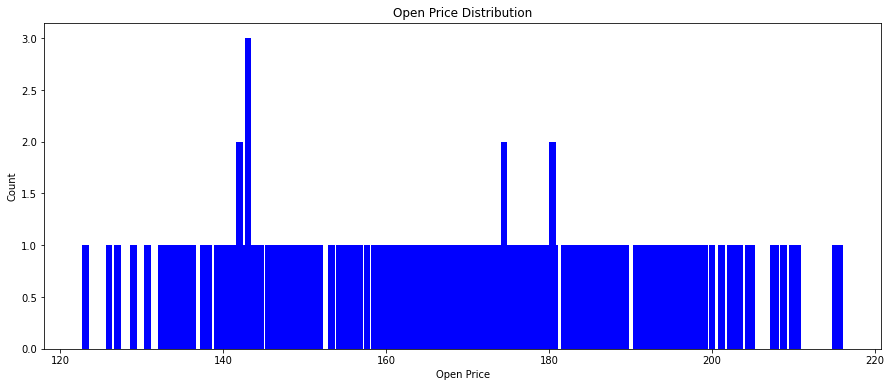

In [11]:
# Histogram for Open
import matplotlib.pyplot as plt

# Extract keys (ratings) and values (counts) from defaultdict
open_price, counts = zip(*value_count_open.items())

# Set a larger figure size
plt.figure(figsize=(15, 6))

# Plot bar chart
plt.bar(open_price, counts, color='blue')
plt.xlabel('Open Price')
plt.ylabel('Count')
plt.title('Open Price Distribution')
plt.show()

In [12]:
# Find the average of Open
    # Sum value
open_sum = open_rdd.reduce(lambda x, y: x + y)
print("Sum of open: ", open_sum)
    # Average
open_average = open_sum/open_rdd.count()
print("Average of open: ", open_average)

Sum of open:  42387.88001999997
Average of open:  168.20587309523796


## 3.2. Max, min, value_count, average of Close ##

In [13]:
# Create Close rdd
close_rdd = rdd_fb_stock.map(lambda row: row.Close)
close_rdd.take(10)

[186.899994,
 185.929993,
 184.919998,
 185.740005,
 187.669998,
 191.779999,
 193.990005,
 193.279999,
 192.940002,
 191.339996]

In [14]:
# Find the max value for Close
print("Close max value: ", close_rdd.max())

# Find the min value for Close
print("Close min value: ", close_rdd.min())

Close max value:  217.5
Close min value:  124.059998


In [15]:
# Value count for Close
value_count_close = close_rdd.countByValue()
value_count_close

defaultdict(int,
            {186.899994: 1,
             185.929993: 1,
             184.919998: 1,
             185.740005: 1,
             187.669998: 1,
             191.779999: 1,
             193.990005: 1,
             193.279999: 1,
             192.940002: 1,
             191.339996: 1,
             188.179993: 1,
             189.100006: 1,
             191.539993: 1,
             192.399994: 1,
             192.410004: 1,
             196.809998: 1,
             195.850006: 1,
             198.309998: 1,
             197.490005: 1,
             202.0: 1,
             201.5: 1,
             201.740005: 1,
             196.350006: 1,
             199.0: 1,
             195.839996: 1,
             196.229996: 1,
             194.320007: 1,
             197.360001: 1,
             192.729996: 1,
             198.449997: 1,
             203.229996: 1,
             204.740005: 1,
             203.539993: 1,
             202.539993: 1,
             206.919998: 1,
             207.3

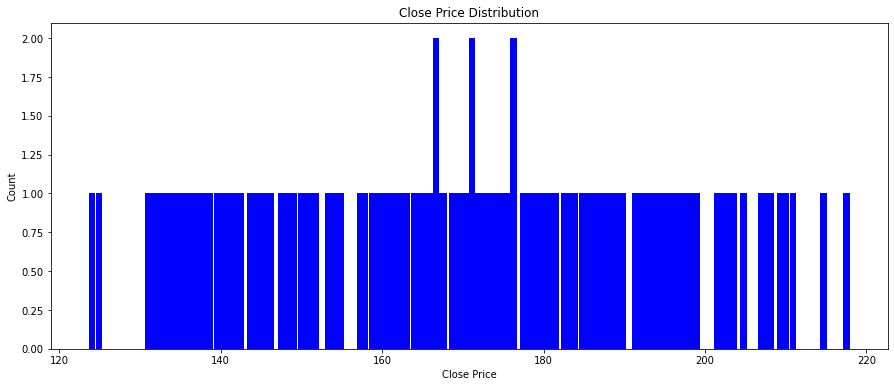

In [16]:
# Histogram for Close
import matplotlib.pyplot as plt

# Extract keys (ratings) and values (counts) from defaultdict
close_price, counts = zip(*value_count_close.items())

# Set a larger figure size
plt.figure(figsize=(15, 6))

# Plot bar chart
plt.bar(close_price, counts, color='blue')
plt.xlabel('Close Price')
plt.ylabel('Count')
plt.title('Close Price Distribution')
plt.show()

In [17]:
# Find the average of Close
    # Sum value
close_sum = close_rdd.reduce(lambda x, y: x + y)
print("Sum of open: ", open_sum)
    # Average
close_average = close_sum/close_rdd.count()
print("Average of Close: ", close_average)

Sum of open:  42387.88001999997
Average of Close:  168.3843645277778
